# **프로그래밍3 201902138 권은비 프로젝트**

#### 교지면적과 학생수의 상관관계분석

In [2]:
#필요한 import
import pandas as pd
import numpy as np

### 데이터 설명

- 데이터의 출처: 경기도 통계 데이터에서 얻은 데이터
- 2020년도 경기도에 있는 대학교와 관련된 데이터

### 데이터 탐색 및 분석 포인트

- 데이터 셋을 확인한다.
- 데이터 전처리 과정을 치룬다.
- 2020년도 경기도 대학교 건물 면적이 클수록 학생 수가 많은 지를 중점으로 분석할 예정이다.
- 시각화/ 그래프 활용하여 비교분석
- 결과 의미도출

In [3]:
#파일 읽어오기
df = pd.read_csv('dff.csv',encoding='cp949')

In [4]:
#데이터 확인
df.head(10)

,대학별(1),대학별(2),대학별(3),학과학부수 (개),학생수 (명),남자학생수 (명),여자학생수 (명),교지면적 (천㎡)
0,남부,소계,소계,"1,178","208,139","118,354","89,785","2,310"
1,남부,수원,아주대학교,40,"13,742","8,966","4,776",147
2,남부,수원,경기대학교,51,"16,512","8,998","7,514",133
3,남부,수원,국제사이버대학교,5,"3,590","1,327","2,263",2
4,남부,성남,가천대학교,85,"25,467","14,086","11,381",287
5,남부,성남,을지대학교,36,"4,925","1,880","3,045",69
6,남부,안양,안양대학교,62,"6,165","3,303","2,862",51
7,남부,안양,성결대학교,31,"7,199","3,814","3,385",59
8,남부,부천,가톨릭대학교,57,"9,611","4,458","5,153",84
9,남부,부천,서울신학대학교,12,"2,770","1,105","1,665",40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   대학별(1)     41 non-null     object
 1   대학별(2)     41 non-null     object
 2   대학별(3)     41 non-null     object
 3   학과학부수 (개)  41 non-null     object
 4   학생수 (명)    41 non-null     object
 5   남자학생수 (명)  41 non-null     object
 6   여자학생수 (명)  41 non-null     object
 7   교지면적 (천㎡)  41 non-null     object
dtypes: object(8)
memory usage: 2.7+ KB


In [6]:
df.isnull().sum().sum()

0

결측값이 없다.

In [7]:
df.shape

(41, 8)

In [8]:
#전체 확인
df

,대학별(1),대학별(2),대학별(3),학과학부수 (개),학생수 (명),남자학생수 (명),여자학생수 (명),교지면적 (천㎡)
0,남부,소계,소계,"1,178","208,139","118,354","89,785","2,310"
1,남부,수원,아주대학교,40,"13,742","8,966","4,776",147
2,남부,수원,경기대학교,51,"16,512","8,998","7,514",133
3,남부,수원,국제사이버대학교,5,"3,590","1,327","2,263",2
4,남부,성남,가천대학교,85,"25,467","14,086","11,381",287
5,남부,성남,을지대학교,36,"4,925","1,880","3,045",69
6,남부,안양,안양대학교,62,"6,165","3,303","2,862",51
7,남부,안양,성결대학교,31,"7,199","3,814","3,385",59
8,남부,부천,가톨릭대학교,57,"9,611","4,458","5,153",84
9,남부,부천,서울신학대학교,12,"2,770","1,105","1,665",40


해당 데이터를 보면 -값과 콤마가 존재함을 확인할 수 있다.

## 데이터 전처리 - object 데이터를 float으로 바꾸기

- 해당 데이터에서 -값을 0으로 변경하기

In [9]:
#데이터 전처리
df['학과학부수 (개)'] = df['학과학부수 (개)'].str.replace('-', '0')

In [10]:
df['학과학부수 (개)'].head()

0    1,178
1       40
2       51
3        5
4       85
Name: 학과학부수 (개), dtype: object

콤마로 인해 object로 뜬다.

In [11]:
#콤마값과 -값 없애기
df['학생수 (명)'] = df['학생수 (명)'].str.replace('-', '0')
df['남자학생수 (명)'] = df['남자학생수 (명)'].str.replace('-', '0')
df['여자학생수 (명)'] = df['여자학생수 (명)'].str.replace('-', '0')
df['교지면적 (천㎡)'] = df['교지면적 (천㎡)'].str.replace('-', '0')

In [12]:
df['학생수 (명)'] = df['학생수 (명)'].str.replace(',', '').astype(float)
df['학과학부수 (개)'] = df['학과학부수 (개)'].str.replace(',', '').astype(float)
df['남자학생수 (명)'] = df['남자학생수 (명)'].str.replace(',', '').astype(float)
df['여자학생수 (명)'] = df['여자학생수 (명)'].str.replace(',', '').astype(float)
df['교지면적 (천㎡)'] = df['교지면적 (천㎡)'].str.replace(',', '').astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   대학별(1)     41 non-null     object 
 1   대학별(2)     41 non-null     object 
 2   대학별(3)     41 non-null     object 
 3   학과학부수 (개)  41 non-null     float64
 4   학생수 (명)    41 non-null     float64
 5   남자학생수 (명)  41 non-null     float64
 6   여자학생수 (명)  41 non-null     float64
 7   교지면적 (천㎡)  41 non-null     float64
dtypes: float64(5), object(3)
memory usage: 2.7+ KB


- 데이터 타입 변경완료

In [14]:
df.dtypes.value_counts()

float64    5
object     3
dtype: int64

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
학과학부수 (개),41.0,64.829268,181.659971,0.0,9.0,31.0,57.0,1178.0
학생수 (명),41.0,11667.219512,32174.009994,0.0,1026.0,5796.0,9611.0,208139.0
남자학생수 (명),41.0,6670.195122,18323.433959,0.0,697.0,3101.0,6081.0,118354.0
여자학생수 (명),41.0,4997.024390,13874.522045,0.0,336.0,2441.0,4225.0,89785.0
교지면적 (천㎡),41.0,132.341463,358.489024,0.0,13.0,59.0,101.0,2310.0


In [16]:
#필요데이터만 선정
df2 = df[['대학별(3)', '학생수 (명)', '교지면적 (천㎡)']]
df2

,대학별(3),학생수 (명),교지면적 (천㎡)
0,소계,208139.0,2310.0
1,아주대학교,13742.0,147.0
2,경기대학교,16512.0,133.0
3,국제사이버대학교,3590.0,2.0
4,가천대학교,25467.0,287.0
5,을지대학교,4925.0,69.0
6,안양대학교,6165.0,51.0
7,성결대학교,7199.0,59.0
8,가톨릭대학교,9611.0,84.0
9,서울신학대학교,2770.0,40.0


In [17]:
#대학별로 교지면적의 최대값 순서배열 
(
df[['대학별(3)', '학생수 (명)', '교지면적 (천㎡)']]
.sort_values(['교지면적 (천㎡)','학생수 (명)'], ascending = False)
.drop_duplicates(subset='학생수 (명)')
)

,대학별(3),학생수 (명),교지면적 (천㎡)
0,소계,208139.0,2310.0
32,소계,31039.0,404.0
4,가천대학교,25467.0,287.0
27,수원대학교,12484.0,223.0
17,단국대학교,16350.0,184.0
39,대진대학교,10306.0,170.0
11,한양대학교,13427.0,156.0
1,아주대학교,13742.0,147.0
2,경기대학교,16512.0,133.0
19,명지대학교 자연캠퍼스,9056.0,124.0


- 대학별로 교지면적의 최대값 순서배열을 하였을때 교지면적이 가장 큰 곳은 가천대, 작은 곳은 사이버대학과 0값을 제외한 칼빈대학교가 가장 작다는 것을 확인

In [18]:
#대학별로 학생수 최대값순으로 정렬
(
df[['대학별(3)', '학생수 (명)', '교지면적 (천㎡)']]
.sort_values(['학생수 (명)','교지면적 (천㎡)'], ascending = False)
.drop_duplicates(subset='학생수 (명)')
)

,대학별(3),학생수 (명),교지면적 (천㎡)
0,소계,208139.0,2310.0
32,소계,31039.0,404.0
4,가천대학교,25467.0,287.0
2,경기대학교,16512.0,133.0
17,단국대학교,16350.0,184.0
1,아주대학교,13742.0,147.0
11,한양대학교,13427.0,156.0
27,수원대학교,12484.0,223.0
39,대진대학교,10306.0,170.0
13,한국산업기술대학교,9661.0,85.0


- 학생수의 최대값 순서배열은 학생수가 제일 많은 건 가천대 적은 건 중앙승가대학교로 나왔습니다.

### 시각화

- 위의 표를 그래프로 표현

<AxesSubplot:xlabel='대학별(3)'>

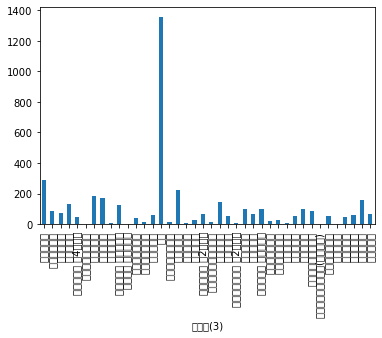

In [20]:
#대학별 교지면적 그래프
df.groupby('대학별(3)')['교지면적 (천㎡)'].mean().plot(kind='bar')

<AxesSubplot:xlabel='대학별(3)'>

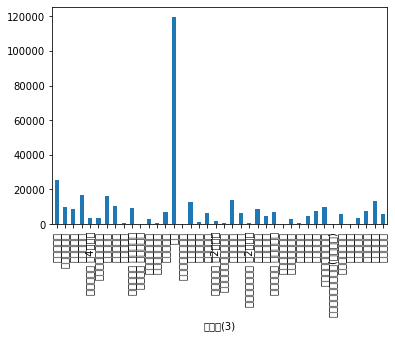

In [21]:
#대학별 학생수 그래프
df.groupby('대학별(3)')['학생수 (명)'].mean().plot(kind='bar')

#### 문제점
1. 하나 값만 너무 크다.
2. 한글 깨짐 현상 (한글이 깨져서 그래프 확인이 어렵다.)

In [22]:
df2

,대학별(3),학생수 (명),교지면적 (천㎡)
0,소계,208139.0,2310.0
1,아주대학교,13742.0,147.0
2,경기대학교,16512.0,133.0
3,국제사이버대학교,3590.0,2.0
4,가천대학교,25467.0,287.0
5,을지대학교,4925.0,69.0
6,안양대학교,6165.0,51.0
7,성결대학교,7199.0,59.0
8,가톨릭대학교,9611.0,84.0
9,서울신학대학교,2770.0,40.0


- 단독으로 큰 값은 이 데이터의 "소계"임으로 이를 빼고 나타나게 하면 된다.

In [23]:
#"소계" 삭제
df2=df2[df2["대학별(3)"]!="소계"]
df2

,대학별(3),학생수 (명),교지면적 (천㎡)
1,아주대학교,13742.0,147.0
2,경기대학교,16512.0,133.0
3,국제사이버대학교,3590.0,2.0
4,가천대학교,25467.0,287.0
5,을지대학교,4925.0,69.0
6,안양대학교,6165.0,51.0
7,성결대학교,7199.0,59.0
8,가톨릭대학교,9611.0,84.0
9,서울신학대학교,2770.0,40.0
10,평택대학교,4820.0,53.0


#### 제거 후 그래프 확인

<AxesSubplot:xlabel='대학별(3)'>

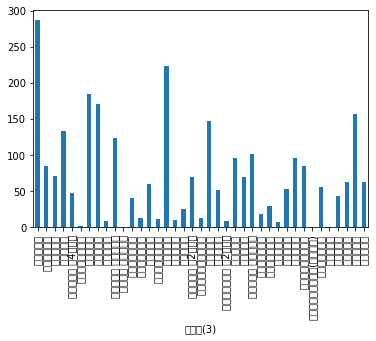

In [25]:
df2.groupby('대학별(3)')['교지면적 (천㎡)'].mean().plot(kind='bar')

<AxesSubplot:xlabel='대학별(3)'>

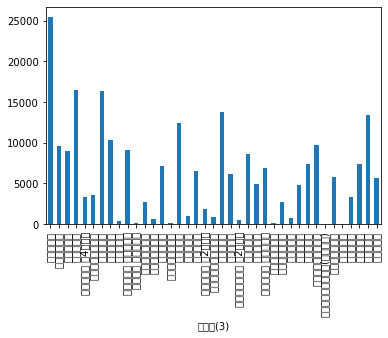

In [26]:
df2.groupby('대학별(3)')['학생수 (명)'].mean().plot(kind='bar')

In [27]:
#한글 깨짐 오류 정정 - 폰트 설정하기
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    
matplotlib.rcParams['axes.unicode_minus'] = False

<AxesSubplot:xlabel='대학별(3)'>

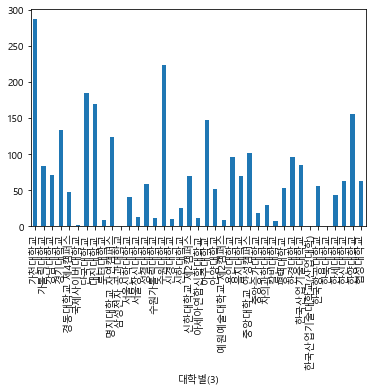

In [28]:
df2.groupby('대학별(3)')['교지면적 (천㎡)'].mean().plot(kind='bar')

<AxesSubplot:xlabel='대학별(3)'>

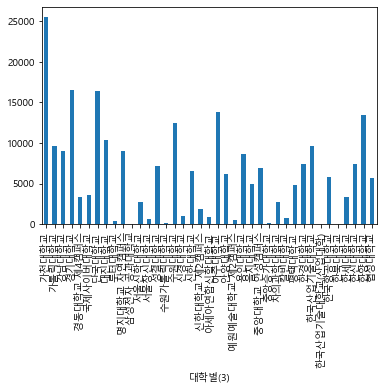

In [29]:
df2.groupby('대학별(3)')['학생수 (명)'].mean().plot(kind='bar')

- 시각적으로 보았을 때 두 그래프의 유사도가 비슷하다. (대체적으로 교지면적이 넓으면 학생수가 많은 것을 볼 수 있음)

### 학생수와 교지면적 상관관계 그래프

- 관계성을 어떻게 시각화하면 잘 보여줄 수 있을까요?

In [30]:
#변수 간의 상관관계 확인
df.corr()

,학과학부수 (개),학생수 (명),남자학생수 (명),여자학생수 (명),교지면적 (천㎡)
학과학부수 (개),1.000000,0.993014,0.991865,0.992816,0.993708
학생수 (명),0.993014,1.000000,0.999437,0.999018,0.997345
남자학생수 (명),0.991865,0.999437,1.000000,0.996968,0.997250
여자학생수 (명),0.992816,0.999018,0.996968,1.000000,0.995748
교지면적 (천㎡),0.993708,0.997345,0.997250,0.995748,1.000000


In [31]:
df.select_dtypes(object).columns

Index(['대학별(1)', '대학별(2)', '대학별(3)'], dtype='object')

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns  

<AxesSubplot:>

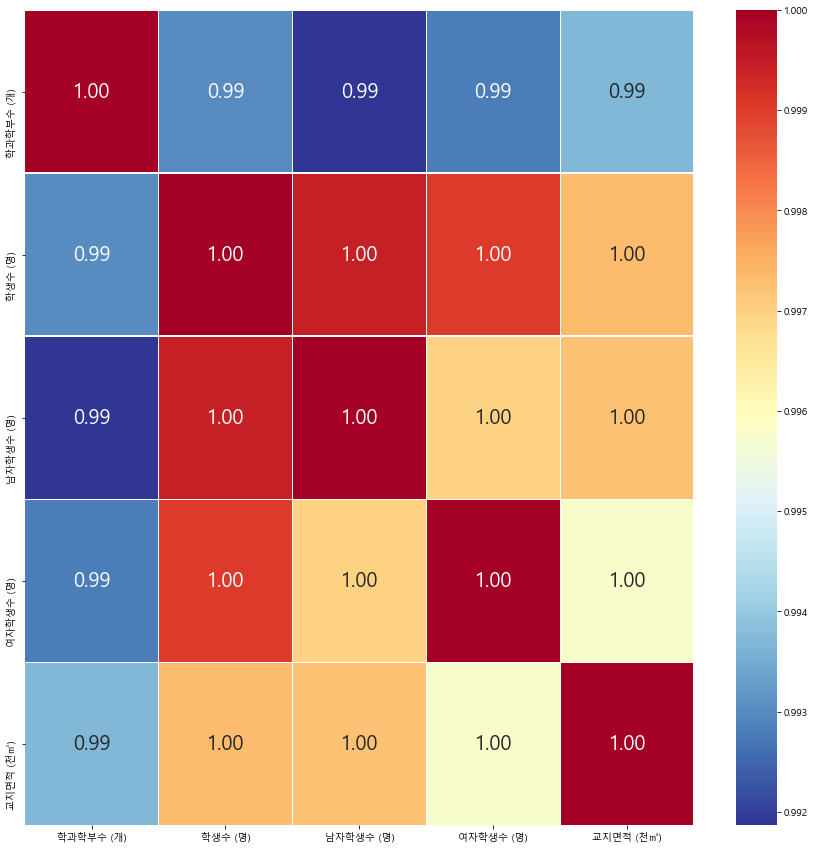

In [33]:
#변수간 상관관계 분석 그래프
plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap = 'RdYlBu_r', annot_kws = {'size' : 20})

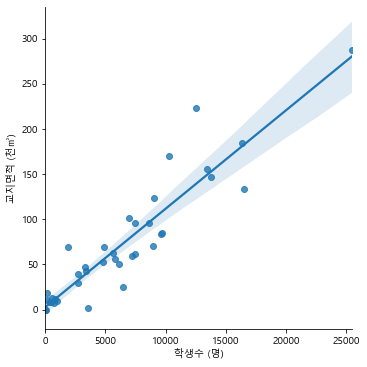

In [34]:
# 상관관계에 회귀선 추가
sns.lmplot(x="학생수 (명)", y="교지면적 (천㎡)", height=5, data=df2)
plt.show()

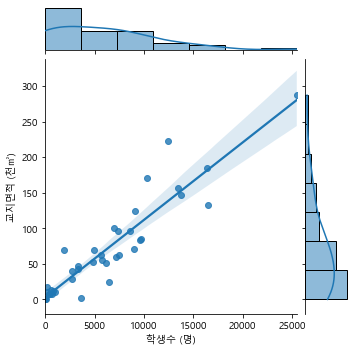

In [35]:
sns.jointplot(x="학생수 (명)", y="교지면적 (천㎡)", height=5, data=df2, kind="reg")
plt.show()

- 학생수와 교지면적은 양의 상관관계를 확인할 수 있다.

# 의미도출 및 결과

- 앞서 분석한 결과로, 학생수와 교지면적은 양의 상관관계임으로 교지면적이 크면 학생수도 많아지는 정비례 관계라고 말할 수 있다.
- 분석을 통해 교지면적이 크면 학생수도 대체적으로 많다는 결과를 얻을 수 있었다.
- 대체적으로 많다는 결과를 도출한 이유는 일부는 아닌 경우가 있었기 때문이다.
- 예를 들어, 수원대학교의 경우 교지면적은 큰 것에 비해 학생수가 적은 결과값이 나왔기 때문이다.
- 반대로, 경기대학교의 경우는 교지면적이 다른 학교에 비해 넓지 않은 반면 학생수가 많았다.

### 어려웠던 점

- 컬럼명이 한글이라 깨짐 현상, 오류가 나서 어려웠다.

- 전처리 과정에서 소계 데이터만 제거하고자 하였을 때 drop를 활용하여 인덱스로 제거하려고 하였으나 해당 데이터가 북부남부로 묶여있어 다른 방안을 찾아서 해결을 했다. (소계 제거)

- 처음 데이터 전처리를 할 때 object가 float으로 변경되지 않아 방안을 찾는데 시간이 걸렸다. (처음에는 -값만 0으로 변경)

- 데이터가 0인 값을 없애려고 drop을 사용했는데 Nan값으로 나타나 제거하고 사용하지 못했다.

### 마무리 및 소감

- 대학교 학생수가 많은 다양한 이유(학교 네임, 재단, 위치 등.)가 있겠지만 교지 면적이 클수록 수용할 수 있는 학생수의 범위가 많아짐으로 교지 면적의 영향이 크다는 사실을 알 수 있었다. 

- 코로나로 인해 비대면 수업이 많아진 상황에서 앞으로 교지면적이 학생수에 대한 영향력이 어떻게 변화하게 될 지 궁금하다. 

## 번외)

알고 싶은 대학교의 데이터만 뽑아 경기도 내의 평균과 비교분석하기

In [40]:
df5 = df.set_index('대학별(3)')

name = input("대학교 명을 입력하시오:")
a=df5.index.str.contains(name)
search= df5[a]

search

대학교 명을 입력하시오: 강남대학교


,대학별(1),대학별(2),학과학부수 (개),학생수 (명),남자학생수 (명),여자학생수 (명),교지면적 (천㎡)
대학별(3),,,,,,,
강남대학교,남부,용인,58.0,8973.0,4680.0,4293.0,71.0


강남대학교의 교지면적은 71, 학생수는 8973명이다.

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
학과학부수 (개),41.0,64.829268,181.659971,0.0,9.0,31.0,57.0,1178.0
학생수 (명),41.0,11667.219512,32174.009994,0.0,1026.0,5796.0,9611.0,208139.0
남자학생수 (명),41.0,6670.195122,18323.433959,0.0,697.0,3101.0,6081.0,118354.0
여자학생수 (명),41.0,4997.024390,13874.522045,0.0,336.0,2441.0,4225.0,89785.0
교지면적 (천㎡),41.0,132.341463,358.489024,0.0,13.0,59.0,101.0,2310.0


- 2020년 경기도 학생수 평균은 약 11667명, 교지면적 평균은 132이다.
- 강남대학교의 경우 경기도 내에 있는 대학교 교지면적과 학생수가 평균보다 작다는 사실을 알 수 있었다.